## Credit Card Fraud Detection
In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

I.PROBLEM STATEMENT
The Major business goal of Banking Industry across the world is to retain highly profitable customers.In this context Banking fraud is a major threat for both banks and their customers in achieving their respective goals. According to Neilson Report by the year 2020 worldwide Bank Frauds ammounts to $30 billion. With digitalisation of transactions the number of fraudulant transactions have also increased.

One of the important Banking frauds is the Credit Card Fraud. Credit card fraud is defined as any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gains. Of late Machine Learning Models are being used by banks for monitoring and preventing frauds.Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

The present project aims at building different Machine Learning Models that can accurately predict fraudulent credit card transactions using the data of European cardholders over a period of two days in the year September 2013. The data is obtained from Kaggle website.

** Follow the below steps to Import data directly from kaggle into Google colab**


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import  files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ushusunnikrishnan","key":"164f1c54c92aad6a6ff60f5d427b7e6c"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:00<00:00, 63.8MB/s]
100% 66.0M/66.0M [00:00<00:00, 96.2MB/s]


In [8]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
import pandas as pd
path="/content/creditcard.csv"
df=pd.read_csv(path)

Importing data completed..

In [10]:
# Importing the libraries
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
# Data display customization
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# Exploratory data analysis

## Reading and understanding the data

In [12]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   

   Amount  Class  
0  149.62      0  
1    2.69      0

In [13]:
#observe the different feature type present in the data
print(df.shape)
print(df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

####  Check for  missing values in columns

In [14]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns.transpose()

Time  V16  Amount  V28  V27  V26  V25  V24  V23  V22  V21  V20  V19  \
null   0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      V18  V17  V15   V1  V14  V13  V12  V11  V10   V9   V8   V7   V6   V5  \
null  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       V4   V3   V2  Class  
null  0.0  0.0  0.0    0.0

there is no missing values in any of the columns.

Here we will observe the distribution of our classes

In [17]:
classes=df['Class'].value_counts()
normal_share=((classes[0]/df['Class'].count()*100).round(4))
fraud_share=((classes[1]/df['Class'].count()*100).round(4))
print('Normal_share:',normal_share,'\nFraud Share :',fraud_share)

Normal_share: 99.8273 
Fraud Share : 0.1727


We can see that there is only 0.17% frauds. 

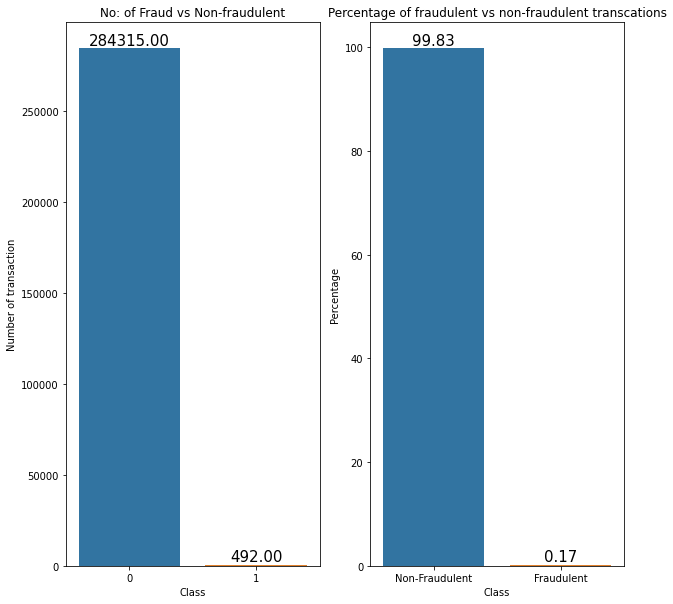

In [18]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,10))

plots=plt.subplot(1,2,1)

sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("No: of Fraud vs Non-fraudulent")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


plots=plt.subplot(1,2,2)

fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

All the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

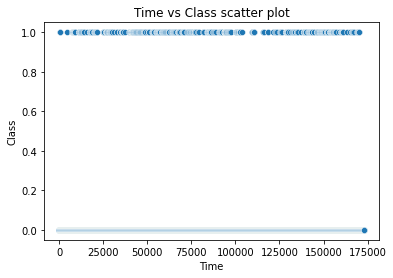

In [19]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

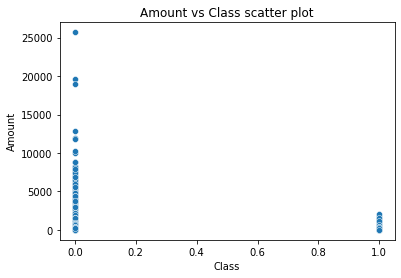

In [20]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Class"], df["Amount"])
plt.title("Amount vs Class scatter plot")
plt.show()

In [21]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

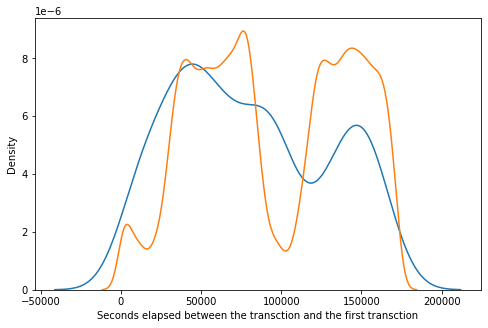

In [22]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

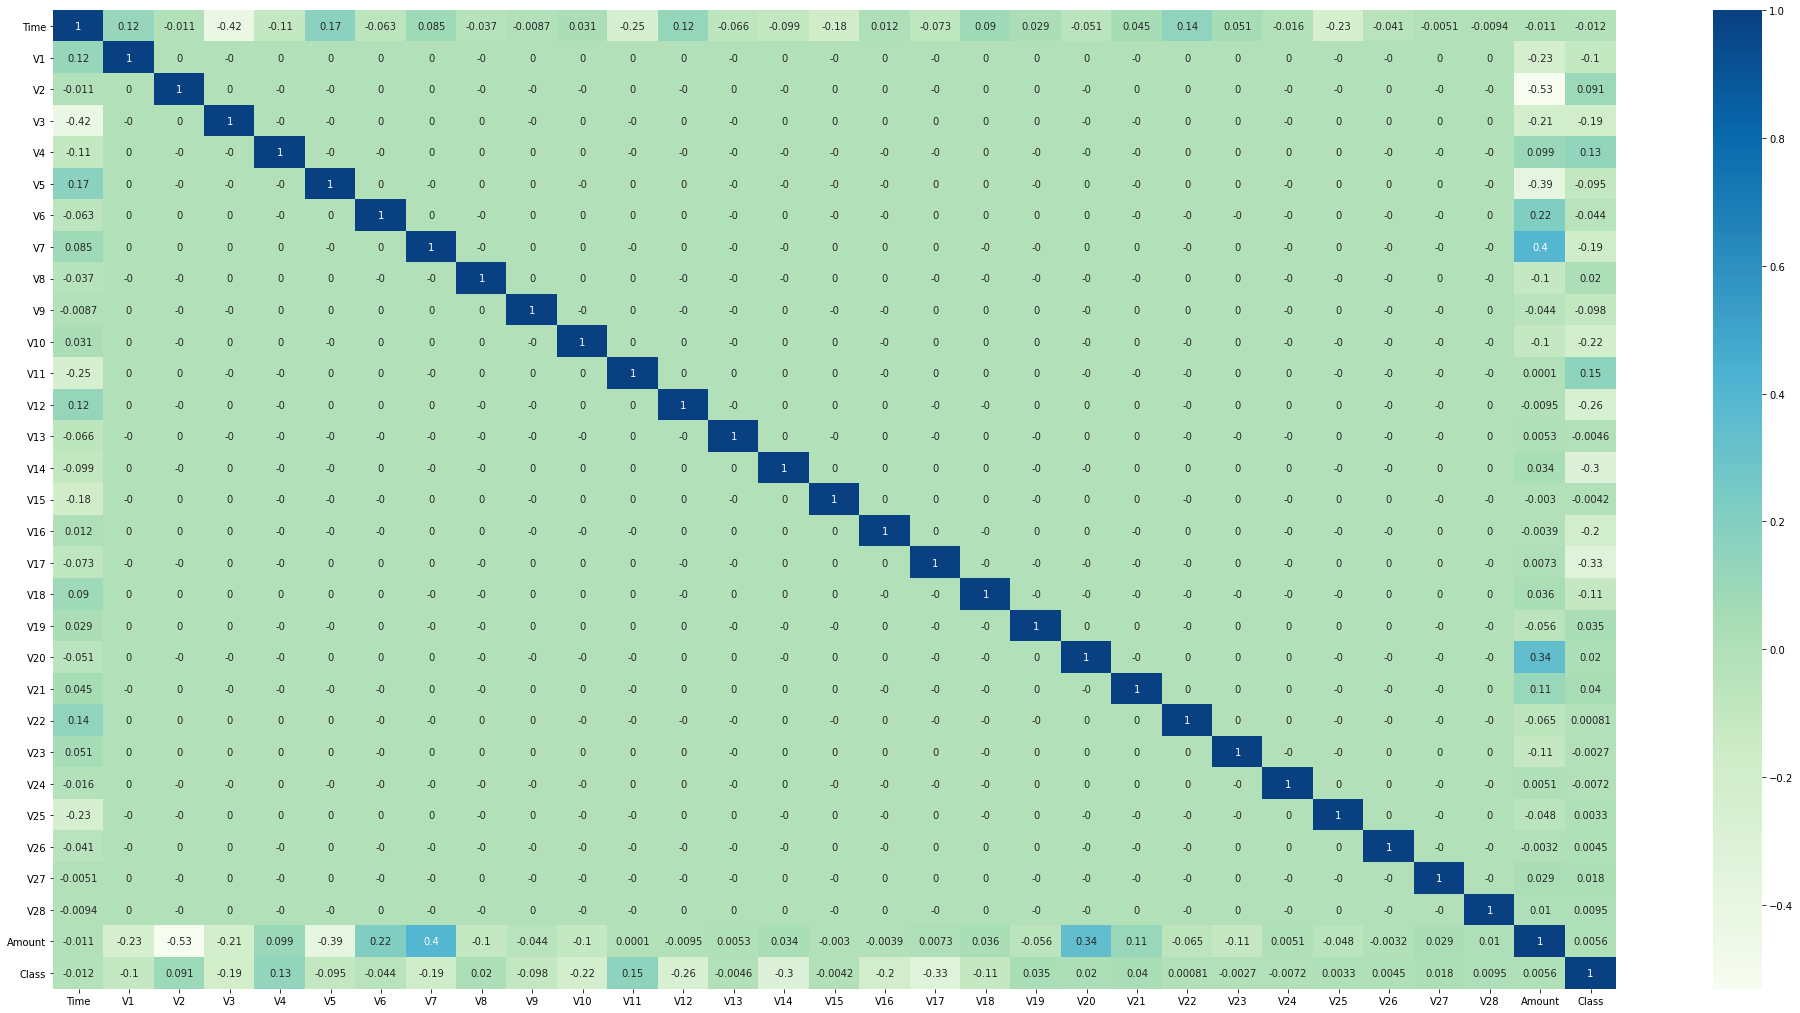

In [23]:
# correlations among the variables
# plotting correlations on a heatmap
plt.figure(figsize=(35,18))

sns.heatmap(df.corr().round(6), cmap="GnBu", annot=True)
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to **Time**.

**0-5000$** are small amount are fradulent amounts triggered compared to large amount


In [24]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Splitting the data into train & test data

In [25]:
# Import library
from sklearn.model_selection import train_test_split

In [26]:
y = df['Class'] #Class Variable

In [27]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [28]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
#### Preserve X_test & y_test to evaluate on the test data once you build the model
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [29]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [30]:
X_train.head(2)

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   

          Amount  
201788 -0.345273  
179369 -0.206439

##### Scaling the test set
 We transform the test set.

In [31]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head(2)

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   

          Amount  
49089  -0.340485  
154704 -0.320859

In [32]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


## Checking the Skewness

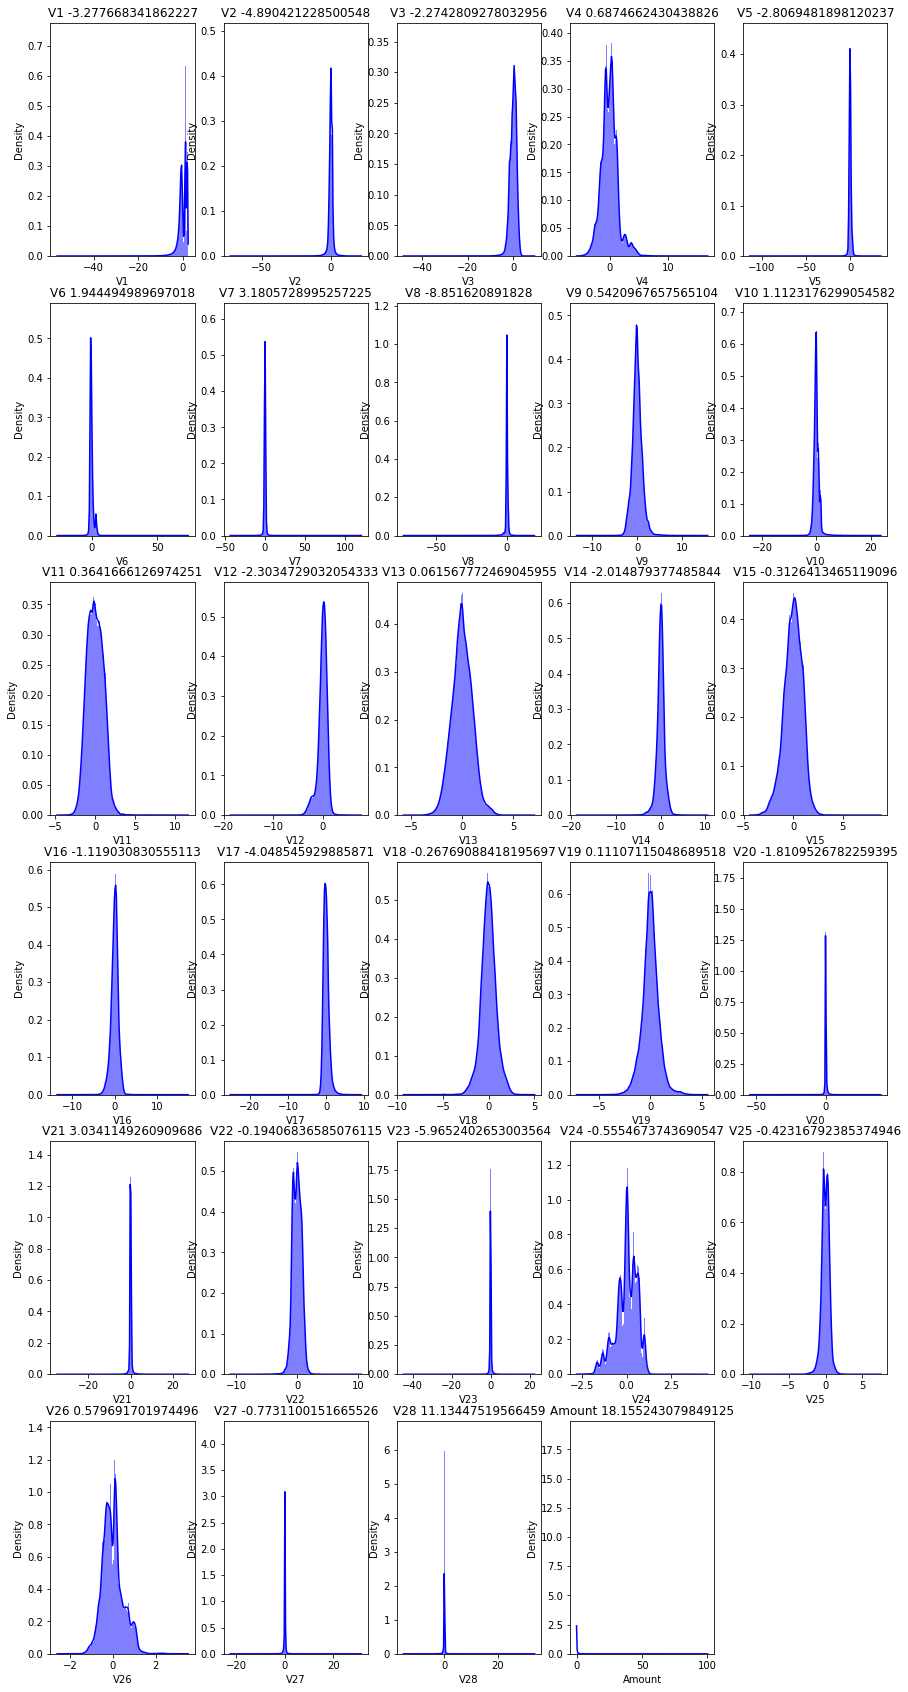

In [33]:
# plot the histogram of a variable from the dataset to see the skewness
# Listing the columns
cols = X_train.columns
k=0
plt.figure(figsize=(15,30))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.histplot(X_train[col], color="blue", label="Skewness Per Feature", kde=True, stat="density", linewidth=0)
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

If there is skewness present in the distribution use:
Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [34]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [35]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

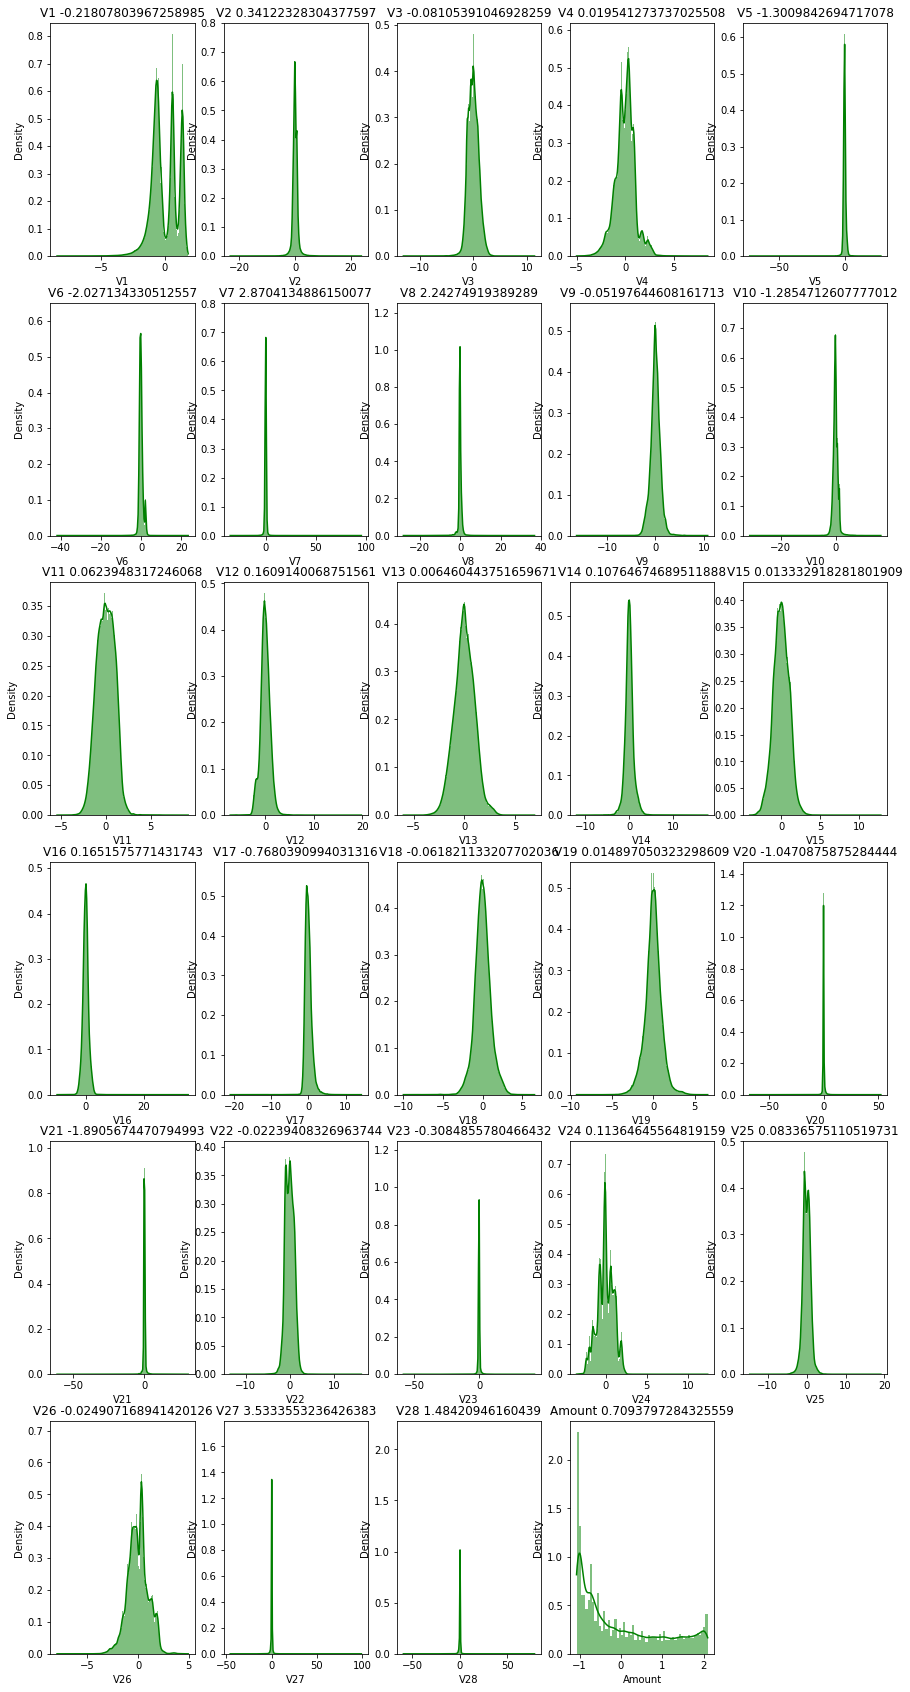

In [36]:
# plot the histogram of a variable from the dataset again to see the result 
k=0
plt.figure(figsize=(15,30))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.histplot(X_train[col], color="green", label="Skewness Per Feature", kde=True, stat="density", linewidth=0)
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

## Model Building
Build different models on the imbalanced dataset and see the result

### Logistic regression

In [37]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [38]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [39]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [40]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   41.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [41]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.965717      0.036849         0.023502        0.001426    0.01   
1       1.254170      0.046291         0.022433        0.000373     0.1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.986856           0.987234           0.968390   
1   {'C': 0.1}           0.986104           0.987144           0.960929   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.982373           0.993743         0.983719        0.008479   
1           0.980620           0.992284         0.981416        0.010893   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.984043            0.984587   
1                2            0.982402            0.983785   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988474            0.985596            0.983075   
1            0.987917            0.984018            0.981187   

   mean_train_score  std_train_score  
0          0.985155         0.001849  
1          0.983862         0.002270

In [42]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9837192853831933
Best hyperparameters:  {'C': 0.01}


#### Logistic regression with optimal C

In [43]:
logistic_imb = LogisticRegression(C=0.01)

In [44]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the train set

In [45]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [46]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [48]:
# Accuracy
print("Accuracy:-",(metrics.accuracy_score(y_train, y_train_pred)).round(3))

# Sensitivity
print("Sensitivity:-",(TP / float(TP+FN)).round(3))

# Specificity
print("Specificity:-", (TN / float(TN+FP)).round(3))

# F1 score
print("F1-Score:-", (f1_score(y_train, y_train_pred)).round(3))

Accuracy:- 0.999
Sensitivity:- 0.659
Specificity:- 1.0
F1-Score:- 0.769


##### ROC on the train set

In [49]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

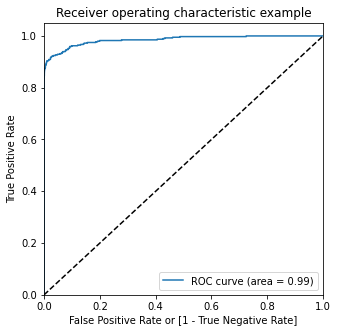

In [51]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [52]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [53]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [54]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


##### ROC on the test set

In [55]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

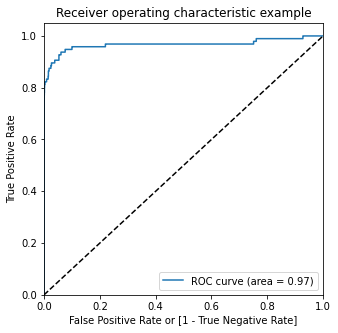

In [56]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.65
    - Specificity = 1.00
    - F1-Score = 0.76
    - ROC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.57
    - Specificity = 0.99
    - F1-Score = 0.65
    - ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [57]:
# Importing XGBoost
from xgboost import XGBClassifier

In [58]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 12.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [59]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      32.917995      0.586583         0.366438        0.005469   
1      42.565709      0.088582         0.364895        0.003434   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.979854   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.976568   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.971801           0.981423         0.977693        0.004215   
1           0.972788           0.977688         0.975682        0.002096   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999894            0.999940   
1                3            0.999965            0.999987   

   split2_train_score  mean_train_score  std_train_score  
0            0.999847          0.999894         0.000038  
1            0.999966          0.999973         0.000010

In [60]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [61]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Prediction on the train set

In [62]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [63]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [64]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996839956988304
Sensitivity:- 0.851010101010101
Specificity:- 0.9999428443299377
F1-Score:- 0.9034852546916889


In [65]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [66]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)

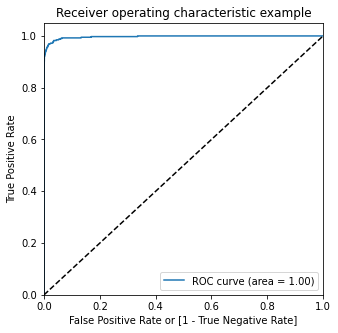

In [67]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### Prediction on the test set

In [68]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [69]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9993504441557529
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.7978142076502732


In [71]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

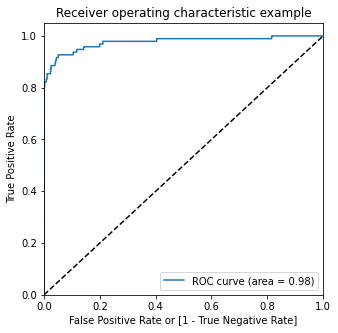

In [73]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.85
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.90
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.76
    - Specificity = 0.99
    - ROC-AUC = 0.98
    - F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.

In [75]:
xgb_imb_model.feature_importances_

array([0.01603912, 0.02546338, 0.023278  , 0.02519945, 0.02163394,
       0.01319833, 0.04106658, 0.02083335, 0.02096797, 0.06651998,
       0.0159001 , 0.04080144, 0.02279252, 0.10389181, 0.01559966,
       0.01527338, 0.30364996, 0.        , 0.01249783, 0.0226299 ,
       0.02541905, 0.02180024, 0.01220128, 0.        , 0.        ,
       0.03430007, 0.04205957, 0.01809782, 0.01888518], dtype=float32)

In [76]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb_imb_model.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

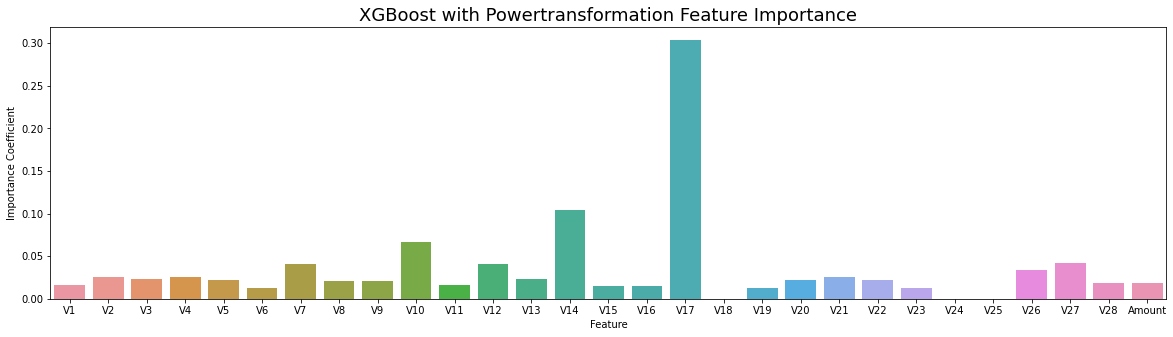

In [77]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("XGBoost with Powertransformation Feature Importance", fontsize=18)

plt.show()

It seems that V17,V14,V1,V7 are important predictors of fraudulant transactions

### Decision Tree

In [78]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                       

In [80]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.407116      0.047574         0.022534        0.000392   
1       3.408043      0.027133         0.022404        0.000349   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933183           0.923883         0.930134        0.004421   
1           0.933180           0.923880         0.930133        0.004422   

   rank_test_score  
0                4  
1                5

In [81]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [82]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Prediction on the train set

In [83]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [84]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [85]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [86]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [87]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

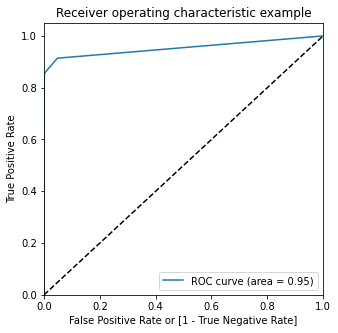

In [88]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


##### Prediction on the test set

In [89]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [91]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [92]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [93]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

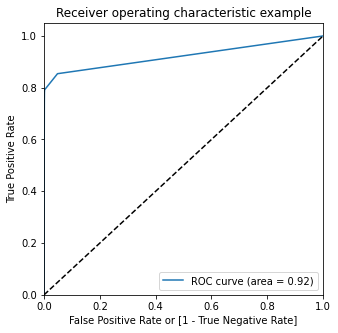

In [94]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.75
    - ROC-AUC = 0.95
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.58
    - Specificity = 0.99
    - F-1 Score = 0.74
    - ROC-AUC = 0.92


### Random forest

In [95]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 93.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [97]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9993065460012871 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [100]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=100)

In [101]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Prediction on the train set

In [102]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [103]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [104]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993460466545239
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7983761840324763


In [105]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [106]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9773100261215178

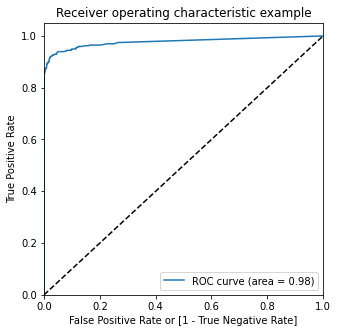

In [107]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [108]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [109]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [110]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989291106351603
Sensitivity:- 0.6145833333333334
Specificity:- 0.9995779551929096
F1-Score:- 0.7983761840324763


In [111]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [112]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9608135792916681

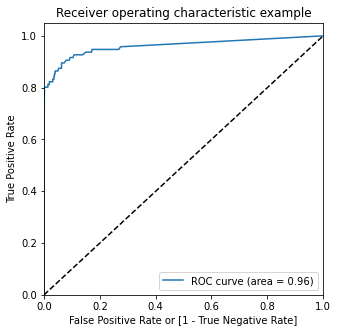

In [113]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.79
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.62
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.96

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as `XGBoost`, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


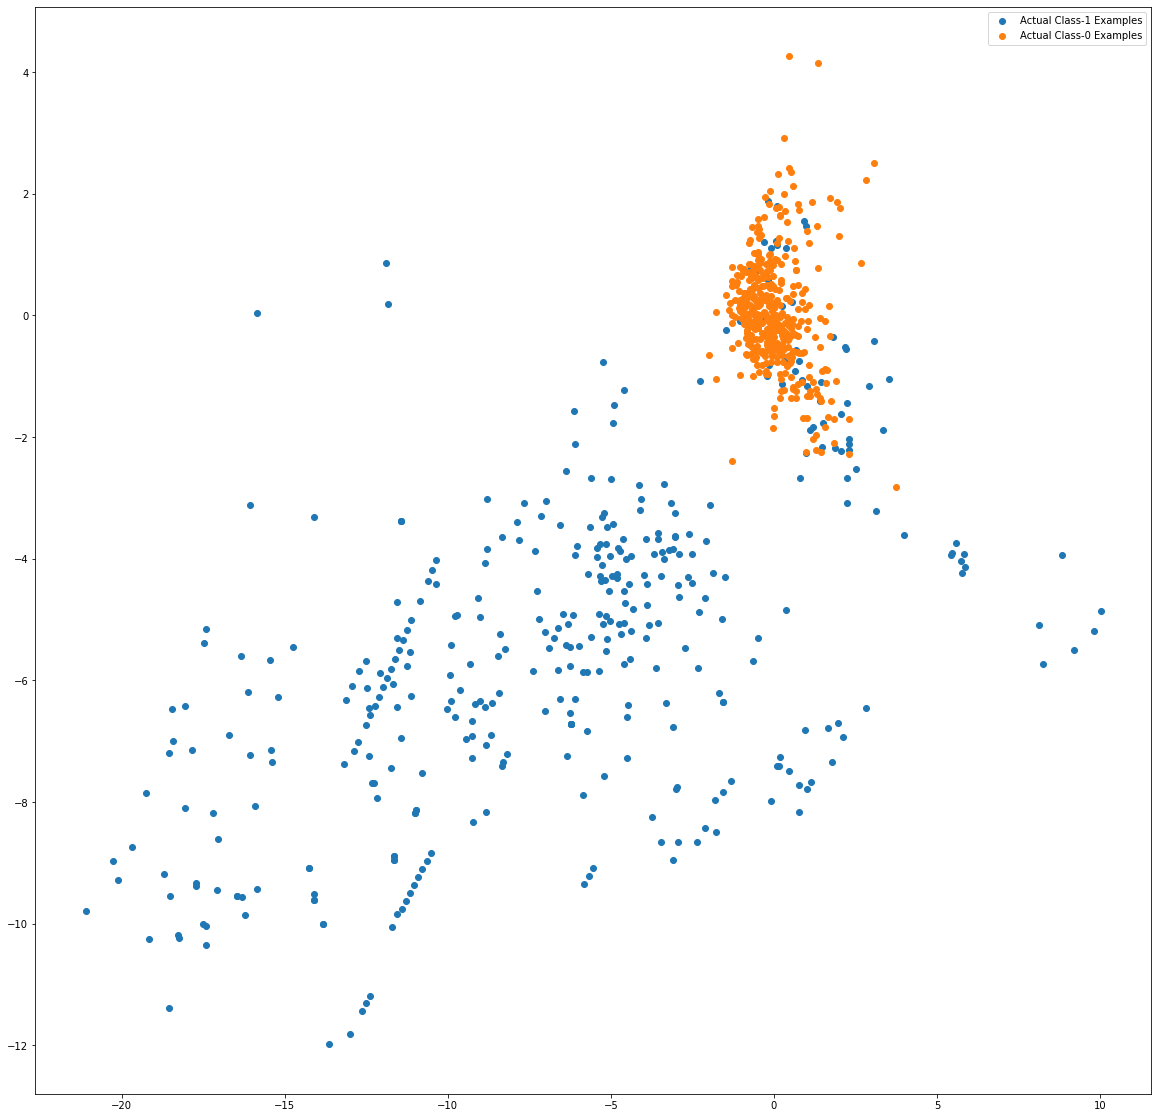

In [114]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [115]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.997010146707991
Threshold= 0.001649919


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

### Model building with balancing Classes
Perform class balancing with :

Random Oversampling

SMOTE

ADASYN

# Random Oversampling

In [116]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [117]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

### Logistic Regression

In [118]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [119]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.484314      0.133232         0.039683        0.001669    0.01   
1       2.611477      0.109713         0.039862        0.002487     0.1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988287           0.988632           0.988507   
1   {'C': 0.1}           0.988283           0.988654           0.988530   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988310           0.988451         0.988438        0.000128   
1           0.988311           0.988460         0.988448        0.000138   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988495            0.988365   
1                5            0.988508            0.988376   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988415            0.988540            0.988421   
1            0.988429            0.988547            0.988433   

   mean_train_score  std_train_score  
0          0.988447         0.000062  
1          0.988459         0.000061

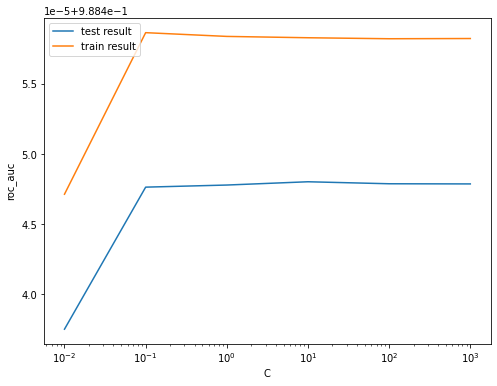

In [120]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [121]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884480296890825 at C = 10


#### Logistic regression with optimal C

In [122]:

logistic_bal_ros = LogisticRegression(C=10)

In [123]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [124]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [125]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9488280889342227
Sensitivity:- 0.9207031026735664
Specificity:- 0.9769530751948788
F1-Score:- 0.9473472305158966


In [127]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [128]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9884542903192803

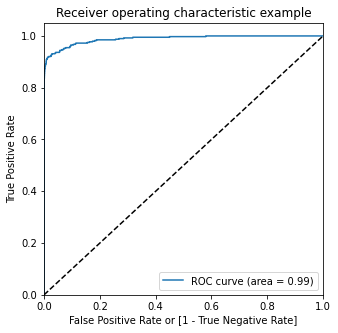

In [129]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [130]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [131]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9761946560865138
Sensitivity:- 0.8854166666666666
Specificity:- 0.9763479056026448


In [133]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [134]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9717345382126403

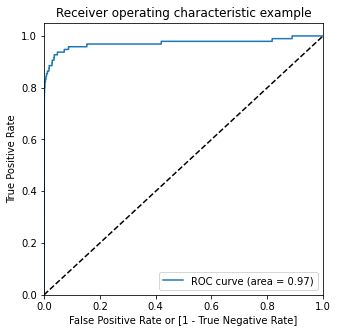

In [135]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [136]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 21.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [137]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      59.703247      0.082042         0.715893        0.013258   
1      72.246458      0.587109         0.725445        0.016643   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999909   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999901   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999927           0.999902         0.999913        0.000011   
1           0.999929           0.999897         0.999909        0.000014   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999926            0.999930   
1                6            0.999921            0.999938   

   split2_train_score  mean_train_score  std_train_score  
0            0.999932          0.999929         0.000002  
1            0.999921          0.999927         0.000008

In [139]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [140]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Prediction on the train set

In [141]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [142]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [143]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9967025574964058
Sensitivity:- 1.0
Specificity:- 1.0


In [144]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [145]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997754596232259

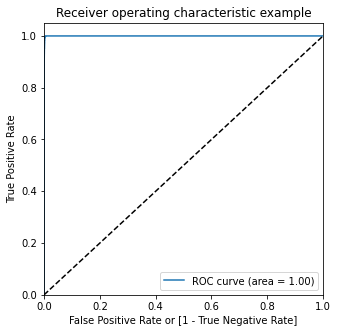

In [146]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [150]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test.values)

In [151]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9951371089498262
Sensitivity:- 0.8125
Specificity:- 0.9954454331234833


In [154]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test.values)[:,1]

In [155]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9714809266521296

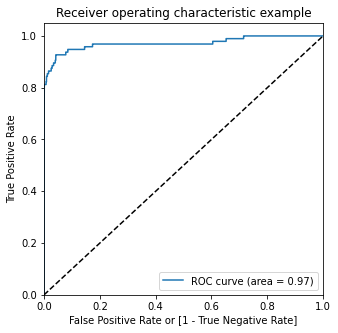

In [156]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.81
    - Specificity = 0.99
    - ROC-AUC = 0.97

### Decision Tree

In [157]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                       

In [158]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.448923      0.023255         0.046423        0.000450   
1       4.456642      0.040416         0.047735        0.001671   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990654   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.990654   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990445           0.983299         0.988132        0.003419   
1           0.990445           0.983273         0.988124        0.003431   

   rank_test_score  
0                5  
1                6

In [159]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.999629634559161
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [160]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Prediction on the train set

In [161]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [162]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9967333336264393
Sensitivity:- 1.0
Specificity:- 0.9934666672528787


In [164]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [165]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9996959076406762

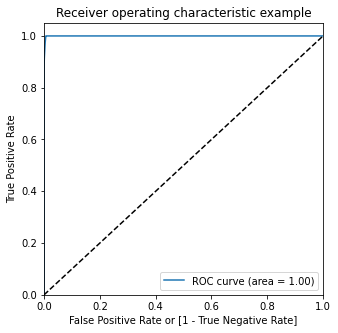

In [166]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [167]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [168]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [169]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9922755521224677
Sensitivity:- 0.78125
Specificity:- 0.9926318010762143


In [170]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [171]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8895719029531413

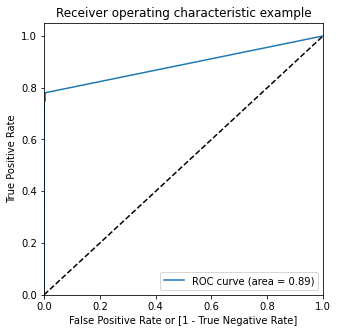

In [172]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.89

## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [173]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [174]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [175]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [176]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [177]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.309450      0.099008         0.042291        0.003796    0.01   
1       2.352805      0.136188         0.043156        0.004690     0.1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989805           0.989796           0.989484   
1   {'C': 0.1}           0.989834           0.989807           0.989488   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989631           0.989910         0.989725        0.000150   
1           0.989632           0.989942         0.989741        0.000161   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989758            0.989666   
1                1            0.989780            0.989686   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989760            0.989841            0.989682   
1            0.989772            0.989853            0.989700   

   mean_train_score  std_train_score  
0          0.989741         0.000063  
1          0.989758         0.000060

In [178]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


#### Logistic regression with optimal C

In [179]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [180]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [181]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [182]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [183]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [184]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

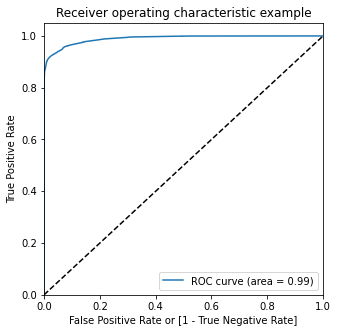

In [185]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [186]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [187]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [188]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


##### ROC on the test set

In [189]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

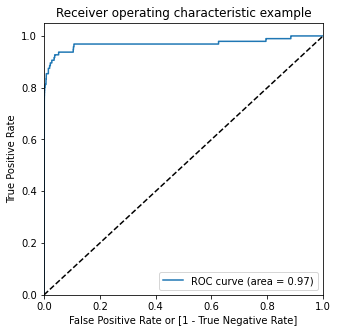

In [190]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.
    - Specificity = 0.99
    - ROC = 0.97

### XGBoost

In [191]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 25.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [192]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      66.838341      0.914931         0.728207        0.039322   
1      86.062814      0.556109         0.714052        0.019547   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999645   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999671   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999753           0.999685         0.999694        0.000045   
1           0.999738           0.999652         0.999687        0.000037   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999718            0.999736   
1                5            0.999733            0.999731   

   split2_train_score  mean_train_score  std_train_score  
0            0.999720          0.999725         0.000008  
1            0.999697          0.999721         0.000017

In [193]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [194]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Prediction on the train set

In [195]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [196]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [197]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9799603427581568
Sensitivity:- 0.970089998197398
Specificity:- 0.9898306873189154


In [198]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [199]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9989949029022795

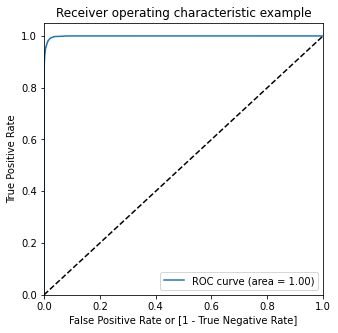

In [200]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [202]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test.values)

In [203]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [204]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.988149994733331
Sensitivity:- 0.8229166666666666
Specificity:- 0.9884289382056062


In [205]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test.values)[:,1]

In [206]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

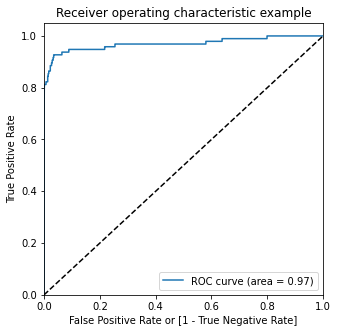

In [207]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.97
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [208]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                       

In [209]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.083660      0.119699         0.050366        0.001653   
1       6.962207      0.084711         0.047818        0.000811   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985690           0.984838         0.985552        0.000535   
1           0.985688           0.984838         0.985551        0.000535   

   rank_test_score  
0                5  
1                6

In [210]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9981009295788899
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [211]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Prediction on the train set

In [212]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [213]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [214]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [215]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [216]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

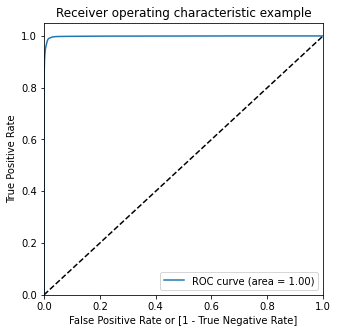

In [217]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [218]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [219]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [220]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [221]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [222]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

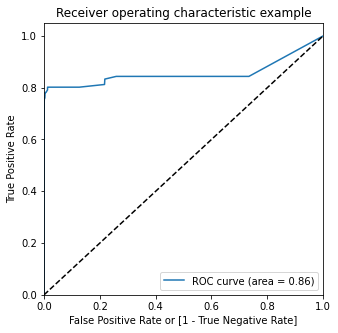

In [223]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


Build models on other algorithms to see the better performing on SMOTE

## AdaSyn (Adaptive Synthetic Sampling)

In [225]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [226]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

### Logistic Regression

In [227]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   42.0s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [228]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.973446      0.021281         0.067795        0.004236    0.01   
1       2.004233      0.074594         0.066802        0.000865     0.1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963474           0.962184           0.963750   
1   {'C': 0.1}           0.963574           0.962298           0.963838   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963136        0.000682                6            0.962946   
1         0.963237        0.000672                5            0.963057   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963458            0.963096          0.963167         0.000215  
1            0.963549            0.963193          0.963266         0.000207

In [229]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.963244960939711 at C = 1000


#### Logistic regression with optimal C

In [230]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [231]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [232]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [233]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [234]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8865545387197541
Sensitivity:- 0.8627906158770356
Specificity:- 0.910318357082247
F1-Score:- 0.8837927788761637


In [235]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [236]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9632739909323009

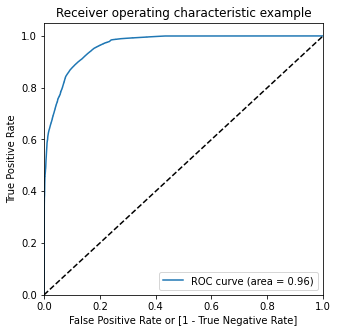

In [237]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [238]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [239]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [240]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [241]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [242]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671249259956154

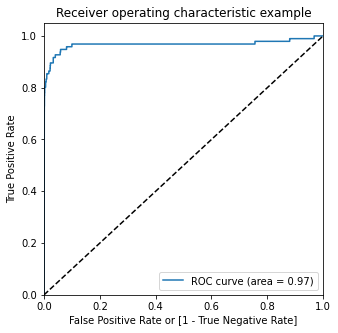

In [243]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

### Decision Tree

In [244]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  3.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 15, 5),
                       

In [245]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.443057      0.048535         0.049347        0.003920   
1       6.318478      0.028769         0.046085        0.000256   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.903869   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.903869   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920405           0.901836         0.908704        0.008316   
1           0.920405           0.902284         0.908853        0.008194   

   rank_test_score  
0                8  
1                7

In [246]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9392221774041626
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [247]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Prediction on the train set

In [248]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [249]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [250]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9723453880768613
Sensitivity:- 0.9944646688473849
Specificity:- 0.9502262045557466


In [251]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [252]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.99169711505698

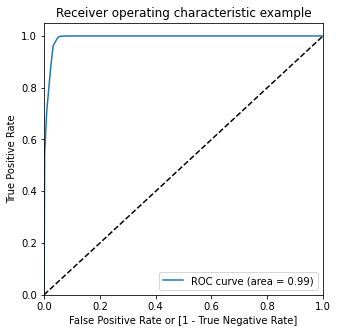

In [253]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [254]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [255]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [256]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9480355324602366
Sensitivity:- 0.84375
Specificity:- 0.9482115851299546


In [257]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [258]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9145582744229124

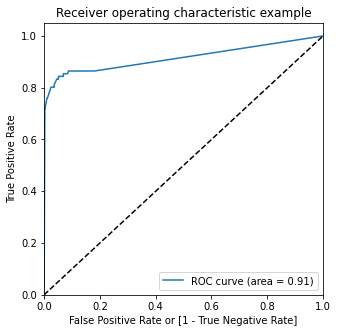

In [259]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

### XGBoost

In [260]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [261]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      64.023437      0.407462         0.720826        0.009971   
1      84.490058      0.925395         0.745529        0.013989   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.976689   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.973383   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.995343           0.995434         0.989155        0.008815   
1           0.995742           0.994294         0.987806        0.010216   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.999317            0.999083   
1                5            0.999299            0.999034   

   split2_train_score  mean_train_score  std_train_score  
0            0.999255          0.999218         0.000099  
1            0.999182          0.999172         0.000109

In [262]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [263]:
# chosen hyperparameters

params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Prediction on the train set

In [264]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [265]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [266]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9777004464746964
Sensitivity:- 1.0
Specificity:- 1.0


In [267]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [268]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9969063196916433

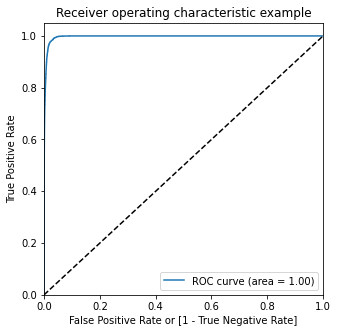

In [269]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [271]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test.values)

In [272]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1]
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [273]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.963800428355746
Sensitivity:- 0.8854166666666666
Specificity:- 0.9639327541940703


In [274]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test.values)[:,1]

In [275]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9660396810044667

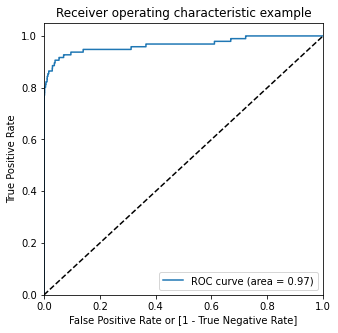

In [276]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.88
    - Specificity = 0.99
    - ROC-AUC = 0.96

In [280]:
xgb_bal_adasyn_model.feature_importances_*100

array([ 4.127499  ,  3.2334638 ,  4.5373006 ,  8.148538  ,  3.613148  ,
        1.4323611 ,  3.783356  ,  6.229994  ,  2.63192   ,  1.133672  ,
        3.1587846 ,  4.2485633 ,  6.7425737 , 17.627102  ,  1.5709684 ,
        0.2567953 ,  2.395029  ,  4.104007  ,  2.4453082 ,  2.4834623 ,
        1.9041376 ,  2.4890554 ,  1.7694194 ,  0.89682806,  1.529734  ,
        2.3610196 ,  1.4722984 ,  0.7857427 ,  2.8879263 ], dtype=float32)

In [284]:
pca_comp = ['V1', 'V2', 'V3', 'V4', 'V5', 
            'V6', 'V7', 'V8', 'V9', 'V10',\
            'V11', 'V12', 'V13', 'V14', 'V15', \
            'V16', 'V17', 'V18', 'V19','V20',\
            'V21', 'V22', 'V23', 'V24', 'V25', \
            'V26', 'V27', 'Amount', 'Time']

In [285]:
tmp = pd.DataFrame({'Feature': pca_comp, 'Feature importance': xgb_bal_adasyn_model.feature_importances_})

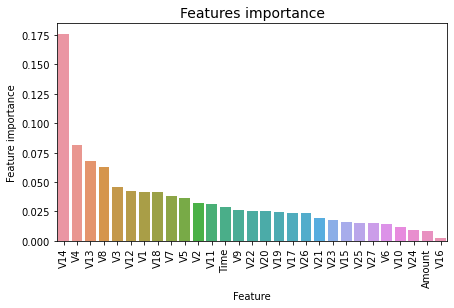

In [286]:
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Choosing best model on the balanced data
We tried balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. 

With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. 

The Undersampling technique models performed well, but in undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.Whereas the SMOTE and Adasyn models performed well. 

The model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model
1.  easy interpretation of the models 
2. less resourse requirements to build the mdoel than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the `Logistic regression model with SMOTE`.
As shown above graph 
Final Inferences on the features of importance for detecting credit card fraud
we observe from the above plot that our final model identified the variables(PCAS): V14,V4,V12,V8 as the most important features in credit card fraud prediction

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [287]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730968845
Threshold= 0.5311563613510134


Conclusion:
We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

Choosing best model on the balanced data
We tried balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy.

With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good.

The Undersampling technique models performed well, but in undersampling some imformation were lost.
Hence, it is better not to consider the undersampling models.Whereas the SMOTE and Adasyn models performed well.

The model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set.

 We can consider the Logistic model as the best model

1. easy interpretation of the models.

2. less resourse requirements to build the mdoel than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE. As shown above graph Final Inferences on the features of importance
for detecting credit card fraud 

we observe from the above plot that our final model identified the variables(PCAS): V14,V4,V12,V8 as the most important features in credit card
fraud prediction